In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

**STELLAR CLASSIFICATION DATASET**

In [9]:
# Load dataset from local file
df = pd.read_csv("/content/StarClassificationDataset.csv")
print("Dataset Loaded:\n", df.head())

Dataset Loaded:
       object_ID        alpha      delta  UV_filter  green_filter  red_filter  \
0  1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501   
1  1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444   
2  1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976   
3  1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162   
4  1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747   

   near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID  \
0        19.16573   18.79371   3606       301        2        79   
1        21.16812   21.61427   4518       301        5       119   
2        19.34857   18.94827   3606       301        2       120   
3        20.50454   19.25010   4192       301        3       214   
4        15.97711   15.54461    NaN       301        3       137   

    spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class  
0  6.540000e+18   0.634794   

<ipython-input-9-1415f723cabd>:2: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/StarClassificationDataset.csv")


In [10]:
# Drop unnecessary columns
df = df.drop(columns=['object_ID'])

In [11]:
# Handle missing values and strip whitespace
df = df.replace(r'^\s*$', np.nan, regex=True).dropna()

In [12]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: ['alpha', 'run_ID', 'class']


In [13]:
# Convert non-numeric columns to numeric
for col in non_numeric_cols:
    if col != 'class':  # Skip the target column
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
# Drop any remaining NaN values after conversion
df = df.dropna()

In [15]:
# Convert categorical target to numeric encoding
class_mapping = {label: idx for idx, label in enumerate(df['class'].unique())}
df['class'] = df['class'].map(class_mapping)

In [16]:
# Define features and target
X = df.drop(columns=['class'])
y = df['class']

In [17]:
# Stratified splitting
df['class'].value_counts(normalize=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Validation set class distribution:\n", y_val.value_counts(normalize=True))

Training set class distribution:
 class
0    0.594417
2    0.215962
1    0.189621
Name: proportion, dtype: float64
Validation set class distribution:
 class
0    0.594409
2    0.215972
1    0.189619
Name: proportion, dtype: float64


In [18]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [19]:
# Train classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


In [20]:
# Evaluate model
y_pred = model.predict(X_val)
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11887
           1       0.96      0.93      0.95      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.98     19998
   macro avg       0.98      0.97      0.98     19998
weighted avg       0.98      0.98      0.98     19998



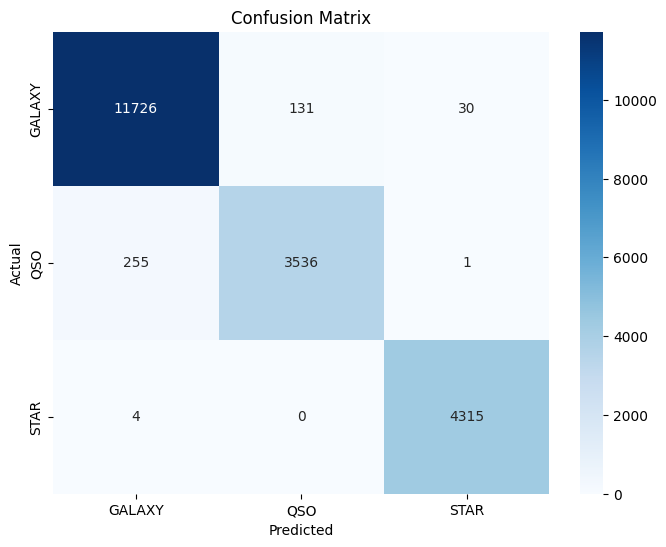

In [21]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Save model and scaler
joblib.dump(scaler, "scaler.pkl")
joblib.dump(model, "stellar_model.pkl")
print("Model and scaler saved successfully")

Model and scaler saved successfully


**CALIFORNIA HOUSING PRICES**

In [24]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
# Load dataset
df = pd.read_csv("housing.csv")
print("Dataset Loaded:\n", df.head())

Dataset Loaded:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [26]:
# Handle missing values
df = df.dropna()

In [27]:
# Define Sturge's Rule for binning
def sturges_rule(n):
    return int(np.ceil(1 + np.log2(n)))


In [28]:
# Apply stratified splitting using Sturge’s Rule
num_bins = sturges_rule(len(df))
df["price_bin"] = pd.cut(df["median_house_value"], bins=num_bins, labels=False)

In [29]:
# Define features and target
X = df.drop(columns=["median_house_value", "price_bin"])
y = df["median_house_value"]

In [30]:
# One-hot encode categorical feature 'ocean_proximity'
X = pd.get_dummies(X, drop_first=True)

In [31]:
# Stratified splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=df["price_bin"], random_state=42)
print("Training and validation sets created using stratified split.")

Training and validation sets created using stratified split.


In [32]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [33]:
# Train Ridge and Lasso models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
print("Models trained successfully.")

Models trained successfully.


In [34]:
# Predictions
y_pred_ridge = ridge.predict(X_val)
y_pred_lasso = lasso.predict(X_val)

In [35]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}\n")
    return mae, mse, rmse

ridge_results = evaluate_model(y_val, y_pred_ridge, "Ridge Regression")
lasso_results = evaluate_model(y_val, y_pred_lasso, "Lasso Regression")

Ridge Regression Evaluation:
MAE: 50398.52
MSE: 5000621993.92
RMSE: 70715.08

Lasso Regression Evaluation:
MAE: 50399.37
MSE: 5000821787.55
RMSE: 70716.49



In [36]:
# Save model and scaler
joblib.dump(scaler, "scaler.pkl")
joblib.dump(ridge, "ridge_model.pkl")
joblib.dump(lasso, "lasso_model.pkl")
print("Models and scaler saved successfully.")

Models and scaler saved successfully.
